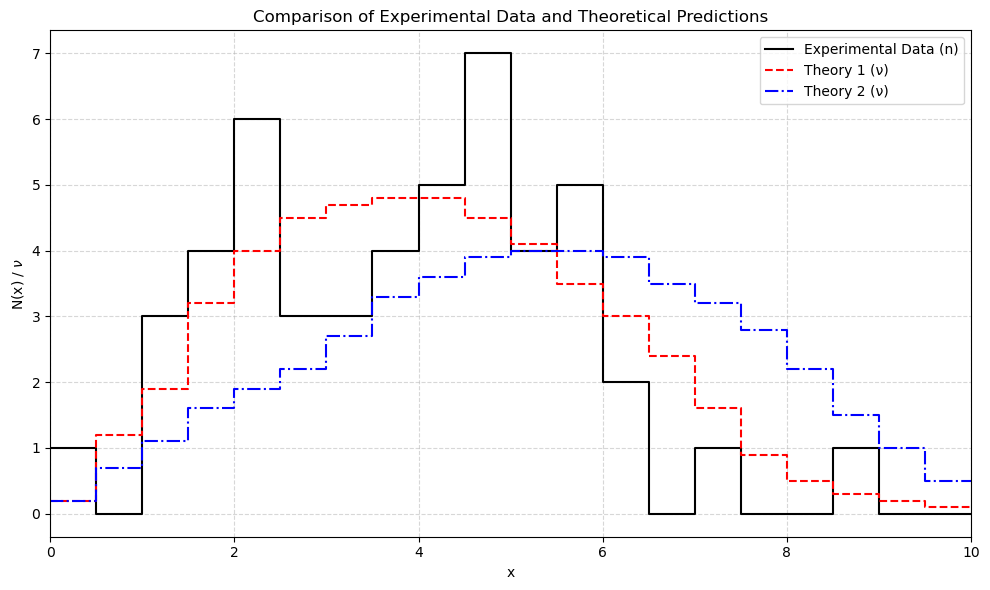

In [1]:
# Exercise 4.4 (a)

import matplotlib.pyplot as plt
import numpy as np

x_min = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5])
x_max = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0])
x_edges = np.append(x_min, x_max[-1])
width = x_max - x_min

n_data = np.array([1, 0, 3, 4, 6, 3, 3, 4, 5, 7, 4, 5, 2, 0, 1, 0, 0, 1, 0, 0])
nu_theory1 = np.array([0.2, 1.2, 1.9, 3.2, 4.0, 4.5, 4.7, 4.8, 4.8, 4.5, 4.1, 3.5, 3.0, 2.4, 1.6, 0.9, 0.5, 0.3, 0.2, 0.1])
nu_theory2 = np.array([0.2, 0.7, 1.1, 1.6, 1.9, 2.2, 2.7, 3.3, 3.6, 3.9, 4.0, 4.0, 3.9, 3.5, 3.2, 2.8, 2.2, 1.5, 1.0, 0.5])

plt.figure(figsize=(10, 6))

plt.step(x_edges, np.append(n_data, n_data[-1]), where='post', color='black', linewidth=1.5, label='Experimental Data (n)')
plt.step(x_edges, np.append(nu_theory1, nu_theory1[-1]), where='post', color='red', linestyle='--', linewidth=1.5, label='Theory 1 (ν)')
plt.step(x_edges, np.append(nu_theory2, nu_theory2[-1]), where='post', color='blue', linestyle='-.', linewidth=1.5, label='Theory 2 (ν)')

plt.xlabel('x')
plt.xlim(0, 10)
plt.ylabel('N(x) / 'r'$\nu$')
plt.title('Comparison of Experimental Data and Theoretical Predictions')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [2]:
chi_2_1 = sum((n_data - nu_theory1)**2 / nu_theory1)
chi_2_2 = sum((n_data - nu_theory2)**2 / nu_theory2)

print(chi_2_1, chi_2_2)

15.819254111754042 35.96526857645278


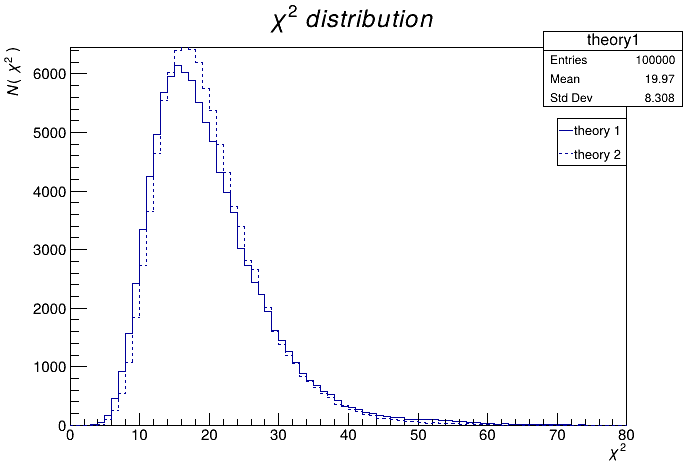

In [3]:
# Exercise 4.4 (b)

import ROOT

NUM = 100000

hist1 = ROOT.TH1D("theory1", "chi^2 distribution based on theory 1", 80, 0, 80)
hist2 = ROOT.TH1D("theory2", "chi^2 distribution based on theory 2", 80, 0, 80)

rnd = ROOT.TRandom3()
rnd.SetSeed(42)

for _ in range(NUM):
    n_theory1 = []
    n_theory2 = []

    for i in range(20):
        n_theory1.append(rnd.Poisson(nu_theory1[i]))
        n_theory2.append(rnd.Poisson(nu_theory2[i]))
    n_theory1 = np.array(n_theory1)
    n_theory2 = np.array(n_theory2)
    chi_2_theory1 = sum((n_theory1 - nu_theory1)**2 / nu_theory1)
    chi_2_theory2 = sum((n_theory2 - nu_theory2)**2 / nu_theory2)

    hist1.Fill(chi_2_theory1)
    hist2.Fill(chi_2_theory2)

canvas = ROOT.TCanvas()

hist1.Draw()
hist2.Draw("same")

hist2.SetLineStyle(2)

hist1.GetXaxis().SetTitle(r"$\chi^2$")
hist1.GetYaxis().SetTitle(r"N($\chi^2$)")

hist1.SetTitle(r"$\chi^2$ distribution")

legend = ROOT.TLegend(0.8, 0.65, 0.9, 0.75)
legend.AddEntry(hist1, "theory 1", "l")
legend.AddEntry(hist2, "theory 2", "l")
legend.Draw()

canvas.Update()



In [4]:
ndf = 20

p_prac_1 = ROOT.TMath.Prob(chi_2_1, ndf)
p_prac_2 = ROOT.TMath.Prob(chi_2_2, ndf)

print(p_prac_1, p_prac_2)

0.7277722172068071 0.015526297603454815


In [5]:
NUM = 200000
cnt1, cnt2 = 0, 0

for _ in range(NUM):
    n_theory1 = []
    n_theory2 = []

    for i in range(20):
        n_theory1.append(rnd.Poisson(nu_theory1[i]))
        n_theory2.append(rnd.Poisson(nu_theory2[i]))
    n_theory1 = np.array(n_theory1)
    n_theory2 = np.array(n_theory2)
    chi_2_theory1 = sum((n_theory1 - nu_theory1)**2 / nu_theory1)
    chi_2_theory2 = sum((n_theory2 - nu_theory2)**2 / nu_theory2)

    if chi_2_theory1 > chi_2_1:
        cnt1 += 1
    if chi_2_theory2 > chi_2_2:
        cnt2 += 1

print(cnt1 / NUM, cnt2 / NUM)


0.652405 0.036195


In [6]:
def mean(values, weights, total_events):
    return sum(value * weight for value, weight in zip(values, weights)) / total_events

def variance(values, weights, mean, total_events):
    return sum(weight * (value - mean) ** 2 for value, weight in zip(values, weights)) / (total_events - 1)

In [7]:
# 4.5 (a)

m_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
n_m = [57, 203, 383, 525, 532, 408, 273, 139, 45, 27, 10, 4, 0, 1, 1]

n_tot = sum(n_m)
mean_m = mean(m_values, n_m, n_tot)
var_m = variance(m_values, n_m, mean_m, n_tot)
t_prac = var_m / mean_m

print(mean_m, var_m, t_prac)

3.871549079754601 3.696190618227001 0.9547058663301989


In [8]:
# 4.5 (b)

ndf = n_tot - 1
p_m = ROOT.TMath.Prob(ndf * t_prac, ndf)

print(p_m)

0.9506710783589312


0.9548


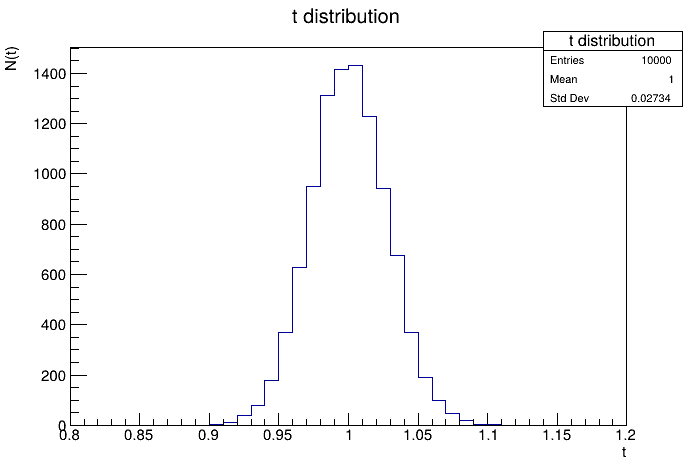

In [9]:
# 4.5 (c)

NUM = 10000

hist3 = ROOT.TH1D('t distribution', 'poisson hypothesis', 40, 0.8, 1.2)
w = [1] * n_tot
cnt = 0

for _ in range(NUM):
    m = []
    for __ in range(n_tot):
        m.append(rnd.Poisson(mean_m))
    mean_ = mean(m, w, n_tot)
    var_ = variance(m, w, mean_, n_tot)
    t = var_ / mean_

    hist3.Fill(t)
    if t >= t_prac:
        cnt += 1

canvas2 = ROOT.TCanvas()
hist3.Draw()

hist3.GetXaxis().SetTitle("t")
hist3.GetYaxis().SetTitle("N(t)")
hist3.SetTitle("t distribution")

canvas2.Update()

print(cnt / NUM)